# Preamble

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pylab as plt

# Generating Unlabelled Data

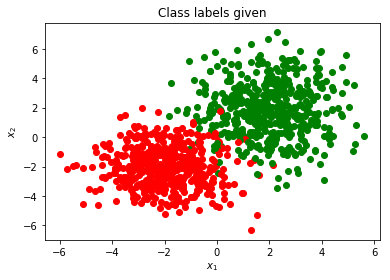

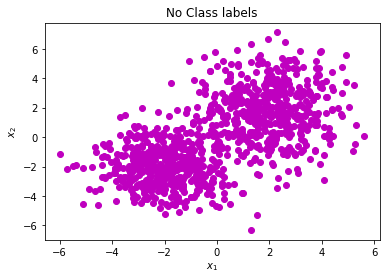

In [7]:
# Training data - two randomly-generated Gaussian-distributed clouds of points in 2d space
np.random.seed(0)
# Number of points
N = 1000
# Labels for each cluster
y = np.random.randint(low=0, high=2, size = N)
c = np.array(["r","g"])
# Mean of each cluster
means = np.array([[-2, 2], [-2, 2],])
# Covariance (in X and Y direction) of each cluster
covariances = np.random.random_sample((2, 2)) + 1
# Dimensions of each point
X = np.vstack([np.random.randn(N)*covariances[0, y] + means[0, y],
               np.random.randn(N)*covariances[1, y] + means[1, y]])

for k in range(X.shape[1]):
    plt.plot(X[0,k],X[1,k],c[y[k]]+"o")
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Class labels given")
plt.show()

for k in range(X.shape[1]):
    plt.plot(X[0,k],X[1,k],"m"+"o")
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("No Class labels")
plt.show()

# Plot the data

# $k$-means Clustering

* Step 1: Choose initial cluster means
    * Choose $k$ random observations
* Step 2: Assign class labels
    * Assign observations to cluster mean closest to it 
* Step 3: Update cluster means
    * Compute cluster means using assigned observations
* Repeat steps until convergence

Counter =  0


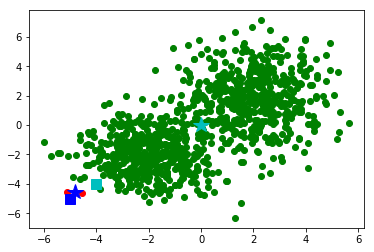

Counter =  1


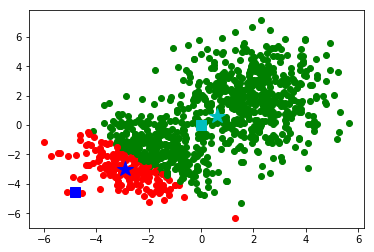

Counter =  2


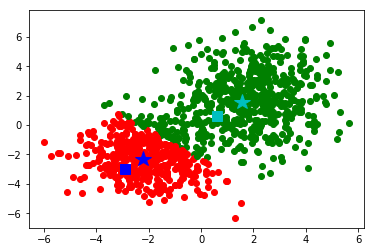

Counter =  3


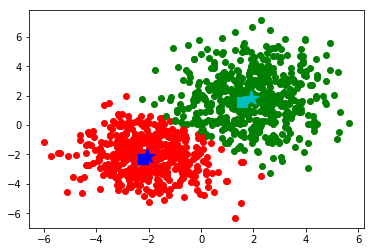

Counter =  4


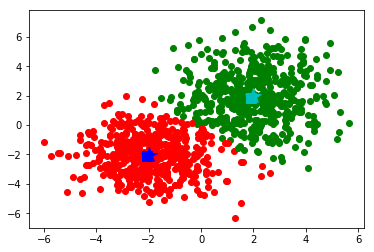

In [52]:
# Generating a random startpoint, two cluster center points - Choose two random samples
start_X_ind = np.random.randint(low=0, high=X.shape[1], size = 2)
Mean = X[:,start_X_ind]

#Overwriting random choice to make it look more impressive
Mean[0,0] = -5
Mean[1,0] = -5

Mean[0,1] = -4
Mean[1,1] = -4

#Class labels
label_ass = np.zeros(y.shape,dtype=int) 

#Perform 5 iterations of K-means
for counter in range(5):
    #Calculate Distances to two cluster points
    d1 = np.sqrt((X[0,:] - Mean[0,0])**2 + (X[1,:] - Mean[1,0])**2)
    d2 = np.sqrt((X[0,:] - Mean[0,1])**2 + (X[1,:] - Mean[1,1])**2)
    
    #Assign a label to each observation depending to which cluster center it is the closest to
    label_ass[d1>=d2] = 1
    label_ass[d2>d1] = 0
    
    Mean_old = np.copy(Mean)
    
    #Calculate new cluster points; mean of all points belonging to the same cluster
    Mean[0,0] = np.mean(X[0,label_ass==0])
    Mean[1,0] = np.mean(X[1,label_ass==0])
    
    Mean[0,1] = np.mean(X[0,label_ass==1])
    Mean[1,1] = np.mean(X[1,label_ass==1])
        
    
    #Plot result
    print("Counter = ",counter)
    if counter%1 == 0:
       for k in range(X.shape[1]):
           plt.plot(X[0,k],X[1,k],c[label_ass[k]]+"o")
            
       #Square old center star new center     
       plt.plot(Mean[0,0],Mean[1,0],"b"+"*",ms=16)
       plt.plot(Mean[0,1],Mean[1,1],"c"+"*",ms=16)
        
       plt.plot(Mean_old[0,0],Mean_old[1,0],"b"+"s",ms=10)
       plt.plot(Mean_old[0,1],Mean_old[1,1],"c"+"s",ms=10)
        
        
    plt.show()
    

  